<h1 style="font-size:180%; color:#DC143C;"><i><b>OpenFood Task G: Advanced EDA</b></i></h1>

"Your task is to do an in-depth analysis of the organic vs. non-organic products distribution in the Open Food database. Look for terms such as “bio” and “organic” in the product names. Your analysis should address the following tasks:"

In [54]:
import numpy as np
import pandas as pd
import os

### Absolute and Relative paths

In [55]:
dirname = os.path.dirname('../input/openfood/')
filename = os.path.join(dirname, 'data_385k.pkl')

In [56]:
filename

'../input/openfood/data_385k.pkl'

### Load OpenFood pickle file

In [57]:
#Load pickle file

df = pd.read_pickle('../input/openfood/data_385k.pkl', compression='zip')

### Display a sample with a few entries

Display a sample of the whole OpenFood dataset

In [58]:
df.sample(3)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
240861,0.0,0722252461339,100.0,mg,57.50,NaN,g,0.0,mg,NaN,...,NaN,NaN,NaN,NaN,0.0,mg,NaN,NaN,NaN,NaN
224339,0.0,0681131062770,149.0,mg,26.39,NaN,g,43.0,mg,NaN,...,NaN,NaN,NaN,NaN,2.2,mg,NaN,NaN,NaN,NaN
108786,0.0,0037600295383,NaN,NaN,6.67,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,mg,NaN,NaN,NaN,NaN


### Pick the columns we need to work and create a new Dataframe (dist).

Pick the columns we need to work and create a new Dataframe (dist, Distributions abbreviation).  Columns: country and product_name to deliver Organic and Non-Organic and portions to plot their distributions.

In [59]:
dist= df[['country', "product_name_en", "product_name_de", "product_name_fr",'carbohydrates_per_portion', 'fat_per_portion', 'protein_per_portion', 'fiber_per_portion']]
dist.sample(3)

,country,product_name_en,product_name_de,product_name_fr,carbohydrates_per_portion,fat_per_portion,protein_per_portion,fiber_per_portion
182074,US,ESPRESSO COFFEE,NaN,NaN,NaN,NaN,NaN,NaN
184307,US,CORN TORTILLA,NaN,NaN,NaN,NaN,NaN,NaN
316821,US,"MEDIUM SALSA, MEDIUM",NaN,NaN,NaN,NaN,NaN,NaN


### Filter rows with either of two partial strings (OR)

" The & means combine the masks and return True where both masks are True, while | means return True where any of the masks is True."

Filter rows where both strings are present (AND)

"Where the order does not matter (Bio can appear first in a row), use str.contains('str1.str2|str2.str1'). The | means ‘return rows where str1 appears first, or str2 appears first’."

pattern = 'bio.organic|organic.bio'

https://shecancode.io/blog/filter-a-pandas-dataframe-by-a-partial-string-or-pattern-in-8-ways/

### "Look to terms like "Bio" and "organic".

"The Series.str.contains method expects a regex pattern (by default), not a literal string. Therefore str.contains("^") matches the beginning of any string. Since every string has a beginning, everything matches. Instead use str.contains("^") to match the literal ^ character."

"To check every column, you could use for col in df to iterate through the column names, and then call str.contains on each column:"

Instead of regex ("^"), I applied pattern cause the requested to "Look to terms like "Bio" and "organic". Then, I defined pattern separated by the bar | (that vertical bar means OR).

In [60]:
#https://stackoverflow.com/questions/52065909/attributeerror-can-only-use-str-accessor-with-string-values-which-use-np-obje
#Since we can only use .str with string columns
# add astype(str) before str.contains Cause we have per_portion columns (float)


pattern = 'Bio|organic'

#The original line doesn't have astype(str) Cause I worked only with cat: country/product_name
#mask = np.column_stack([dist[col].str.contains(pattern, na=False) for col in dist])


#astype(str) is required cause per_portion is numerical
mask = np.column_stack([dist[col].astype(str).str.contains(pattern, na=False) for col in dist])
dist.loc[mask.any(axis=1)]

,country,product_name_en,product_name_de,product_name_fr,carbohydrates_per_portion,fat_per_portion,protein_per_portion,fiber_per_portion
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,37.5,0.21,5.50,NaN
2,CH,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio,NaN,NaN,NaN,NaN
8,CH,Naturaplan Bio Flower Honey,Naturaplan Bio Blütenhonig,Naturaplan Miel de fleurs Bio,8.0,0.00,0.05,0.0
178,CH,Naturaplan - Coconut milk (organic),Naturaplan - Kokosnussmilch (bio),Naturaplan - Lait de coco (bio,0.5,6.60,0.50,0.0
181,CH,Naturaplan - Organic mayonnaise,Naturaplan - Bio-Mayonnaise,Naturaplan - Mayonnaise bio,0.0,12.20,0.20,0.2
...,...,...,...,...,...,...,...,...
385177,CH,NaN,Florentin Organic Chicken - Salade Hummus Bio ...,Florentin Organic Chicken - Salade Hummus Bio ...,NaN,NaN,NaN,NaN
385247,CH,Coop Naturaplan Bio - Oolong Green Tea,NaN,NaN,NaN,NaN,NaN,NaN
385261,CH,NaN,Florentin Organic Chicken - Salade Hummus Bio ...,Florentin Organic Chicken - Salade Hummus Bio ...,NaN,NaN,NaN,NaN
385331,CH,Coop Naturaplan Bio - Oolong Green Tea,NaN,NaN,NaN,NaN,NaN,NaN


### Since mask is just a ndarray  ....

ndarray: The number of dimensions and items in an array.

Create a dataframe Bio with the last line: dist.loc[mask.any(axis=1)]

In [61]:
type(mask)

numpy.ndarray

### La voilà, la liste des produits "biô" (dataframe)

I didn't include "natural" cause that filter/mask with str.contains, stack and the two suggested words on the task (bio and organic) already returned rows that have "natural" string.

Though, this "Naturaplan" seems to be in both organic and non-organic. 

In [62]:
Bio= dist.loc[mask.any(axis=1)]
Bio.head()

,country,product_name_en,product_name_de,product_name_fr,carbohydrates_per_portion,fat_per_portion,protein_per_portion,fiber_per_portion
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,37.5,0.21,5.50,NaN
2,CH,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio,NaN,NaN,NaN,NaN
8,CH,Naturaplan Bio Flower Honey,Naturaplan Bio Blütenhonig,Naturaplan Miel de fleurs Bio,8.0,0.00,0.05,0.0
178,CH,Naturaplan - Coconut milk (organic),Naturaplan - Kokosnussmilch (bio),Naturaplan - Lait de coco (bio,0.5,6.60,0.50,0.0
181,CH,Naturaplan - Organic mayonnaise,Naturaplan - Bio-Mayonnaise,Naturaplan - Mayonnaise bio,0.0,12.20,0.20,0.2


### And the Non-Organic products. Use a tilde (~) to negate. 

Applying the filtering mask to the data using a tilde (~) to negate the statement.

"Naturaplan" is on both outputs???

In [63]:
#SheCanCode https://shecancode.io/blog/filter-a-pandas-dataframe-by-a-partial-string-or-pattern-in-8-ways/

non_Bio= dist.loc[~mask.any(axis=1)]
non_Bio.head()

,country,product_name_en,product_name_de,product_name_fr,carbohydrates_per_portion,fat_per_portion,protein_per_portion,fiber_per_portion
1,CH,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella,1.13,13.50,14.25,0.00
3,CH,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolat en poudre,11.97,1.34,1.16,1.55
4,CH,Naturaplan Extra Dark Chocolate 70%,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Chocolat extra noir 70%,7.40,8.80,1.60,1.80
5,CH,NaN,Cailler - Kakaopulver,Cailler - Poudre de cacao,1.90,3.60,3.30,NaN
6,CH,Toblerone,Toblerone,Toblerone,15.00,7.40,1.40,0.60


## G.a) Total number of samples by country

Austria (AT) and UUnited Kingdom(UK) have only one entry and don't even show on Bio (organic numbers).

In [64]:
#total samples by country use value_counts() function.

dist['country'].value_counts()

country
US    328289
CH     43617
DE     10639
IT      2719
FR       118
AT         1
UK         1
Name: count, dtype: int64

### Organic

On the organic country samples, we didn't even need to drop the rows (AT/UK).

In [65]:
Bio['country'].value_counts()

country
CH    1502
DE     103
IT       4
US       4
FR       2
Name: count, dtype: int64

### However,on Non-Organic we have AT and UK.

In [66]:
non_Bio['country'].value_counts()

country
US    328285
CH     42115
DE     10536
IT      2715
FR       116
AT         1
UK         1
Name: count, dtype: int64

### G.a) Drop Countries with very small sample sizes

Drop rows on multiple conditions in dataframes

Let's drop the rows (AT/UK) in non_Bio dataframe, cause Bio has none of these columns. 

In [67]:
#https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe 
#Answered by Saurabh Nov 22, 2018 at 18:03
#It was funny cause the most voted solution didn't work.

non_org = non_Bio.loc[~((non_Bio['country']=='AT') | (non_Bio['country']=='UK'))]

### Now, the small samples are gone:

No more Austria and United Kingdom (AT/UK) samples/rows in non_org dataframe.

In [68]:
non_org['country'].value_counts()

country
US    328285
CH     42115
DE     10536
IT      2715
FR       116
Name: count, dtype: int64

## G. b) Organic and non-Organic Products percentage

Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?

Percent of Bio by Countries. Switzerland on top. Followed by Deutschland, Italy and France. There was No need to drop countries with small amount cause they have only one entry that's Non-organic.

In [69]:
#Since True/False corresponds to 1/0, all you need is an astype conversion from bool to int:
#https://www.codecademy.com/learn/stats-summary-statistics-for-categorical-data/modules/stats-summary-statistics-for-categorical-data/cheatsheet

#Organic products Percentage

Bio['country'].value_counts()/Bio['country'].value_counts().sum()

country
CH    0.930031
DE    0.063777
IT    0.002477
US    0.002477
FR    0.001238
Name: count, dtype: float64

### Non-Organic products Percentage by Countries.

In [70]:
#Since True/False corresponds to 1/0, all you need is an astype conversion from bool to int:
#https://www.codecademy.com/learn/stats-summary-statistics-for-categorical-data/modules/stats-summary-statistics-for-categorical-data/cheatsheet

#Non-Organic products Percentage

non_org['country'].value_counts()/non_org['country'].value_counts().sum()

country
US    0.855428
CH    0.109741
DE    0.027454
IT    0.007075
FR    0.000302
Name: count, dtype: float64

### Import Libraries for Visualizations

In [71]:
#Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## G.c) Distributions of the Organic and Non-Organic products

"Totals or portions don’t give a very detailed picture. Compare the distributions of the macronutrients between organic and non-organic products in each country. Your solution method should include appropriate visualisations in the subplots format. Note that bar charts aren’t not the best way to communicate distributions"

We're going to work with portions. In other words, numerical data cause it was **suggested to plot violins** for this task.

### About Violin charts

"A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable."

"Violin plots have many of the same summary statistics as box plots:

"The white dot represents the median." 

"The thick gray bar in the center represents the interquartile range."

"The thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range."

"On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability."

By Joel Carron (December 13, 2021) https://mode.com/blog/violin-plot-examples

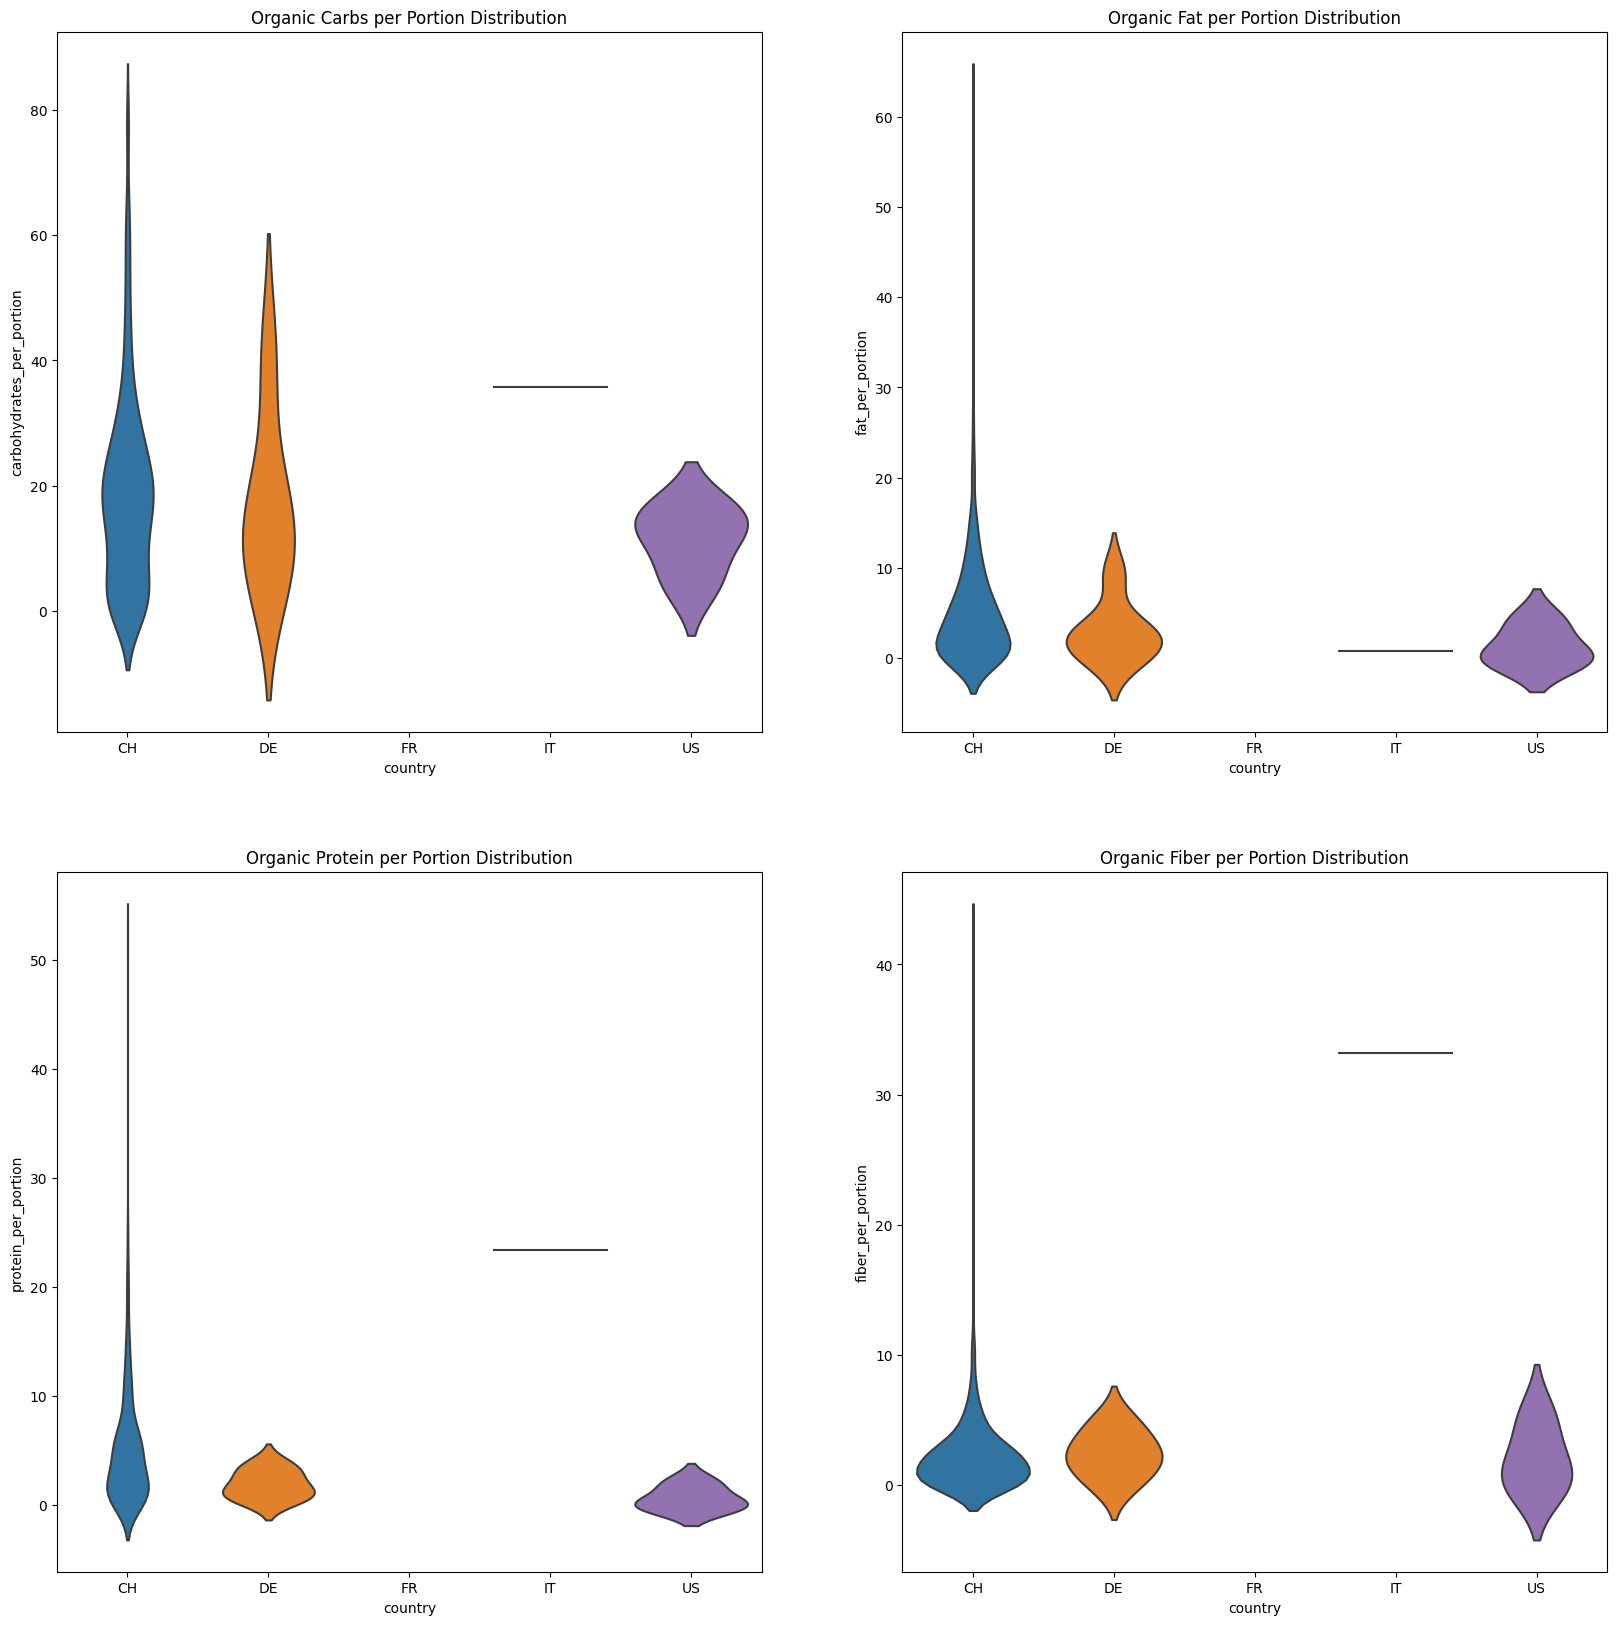

In [72]:
# Displaying multiple violin plots using subplot function.
fig1 , axes = plt.subplots(nrows=2,ncols=2 , figsize = (20,20))
sns.violinplot(x="country" , y = "carbohydrates_per_portion" , ax = axes[0,0] ,data=Bio , inner=None)
sns.violinplot(x="country" , y = "fat_per_portion" ,ax = axes[0,1] , data=Bio , inner=None)
sns.violinplot(x="country" , y = "protein_per_portion" , ax = axes[1,0] , data=Bio, inner=None)
sns.violinplot(x="country" , y = "fiber_per_portion" , ax = axes[1,1] , data=Bio, inner=None )

axes[0,0].set_title('Organic Carbs per Portion Distribution')
axes[0,1].set_title('Organic Fat per Portion Distribution')
axes[1,0].set_title('Organic Protein per Portion Distribution')
axes[1,1].set_title('Organic Fiber per Portion Distribution')
plt.show()

### Observations Organic Macronutrients Distributions

Our Organic violins (Switzerland and Deutschland) sections are thin, which represent a lower probability of the macronutrients take on the given value.

We don't see **any dot (median),bar(interquartile range)** or line (the rest of the distribution, except outliers)

**Wider sections** (barriguinha) of the violin plot represent a **higher probability** that members of the population will take on the given value; the skinnier sections represent a lower probability.

* In Carbs: Higher probability is among 0-20

Switzerland carbs distribution achieved more than 80

* In Fat: Higher probability is among - 0-10

Switzerland fat distribution reachs more than 60.

* In Protein: Higher probability is near zero.

Switzerland protein distribution reached more than 50.

* In Fiber: Higher probability is almost near zero.

Switzerland fiber distribution is above 40.

The line corresponds to the Italy products.

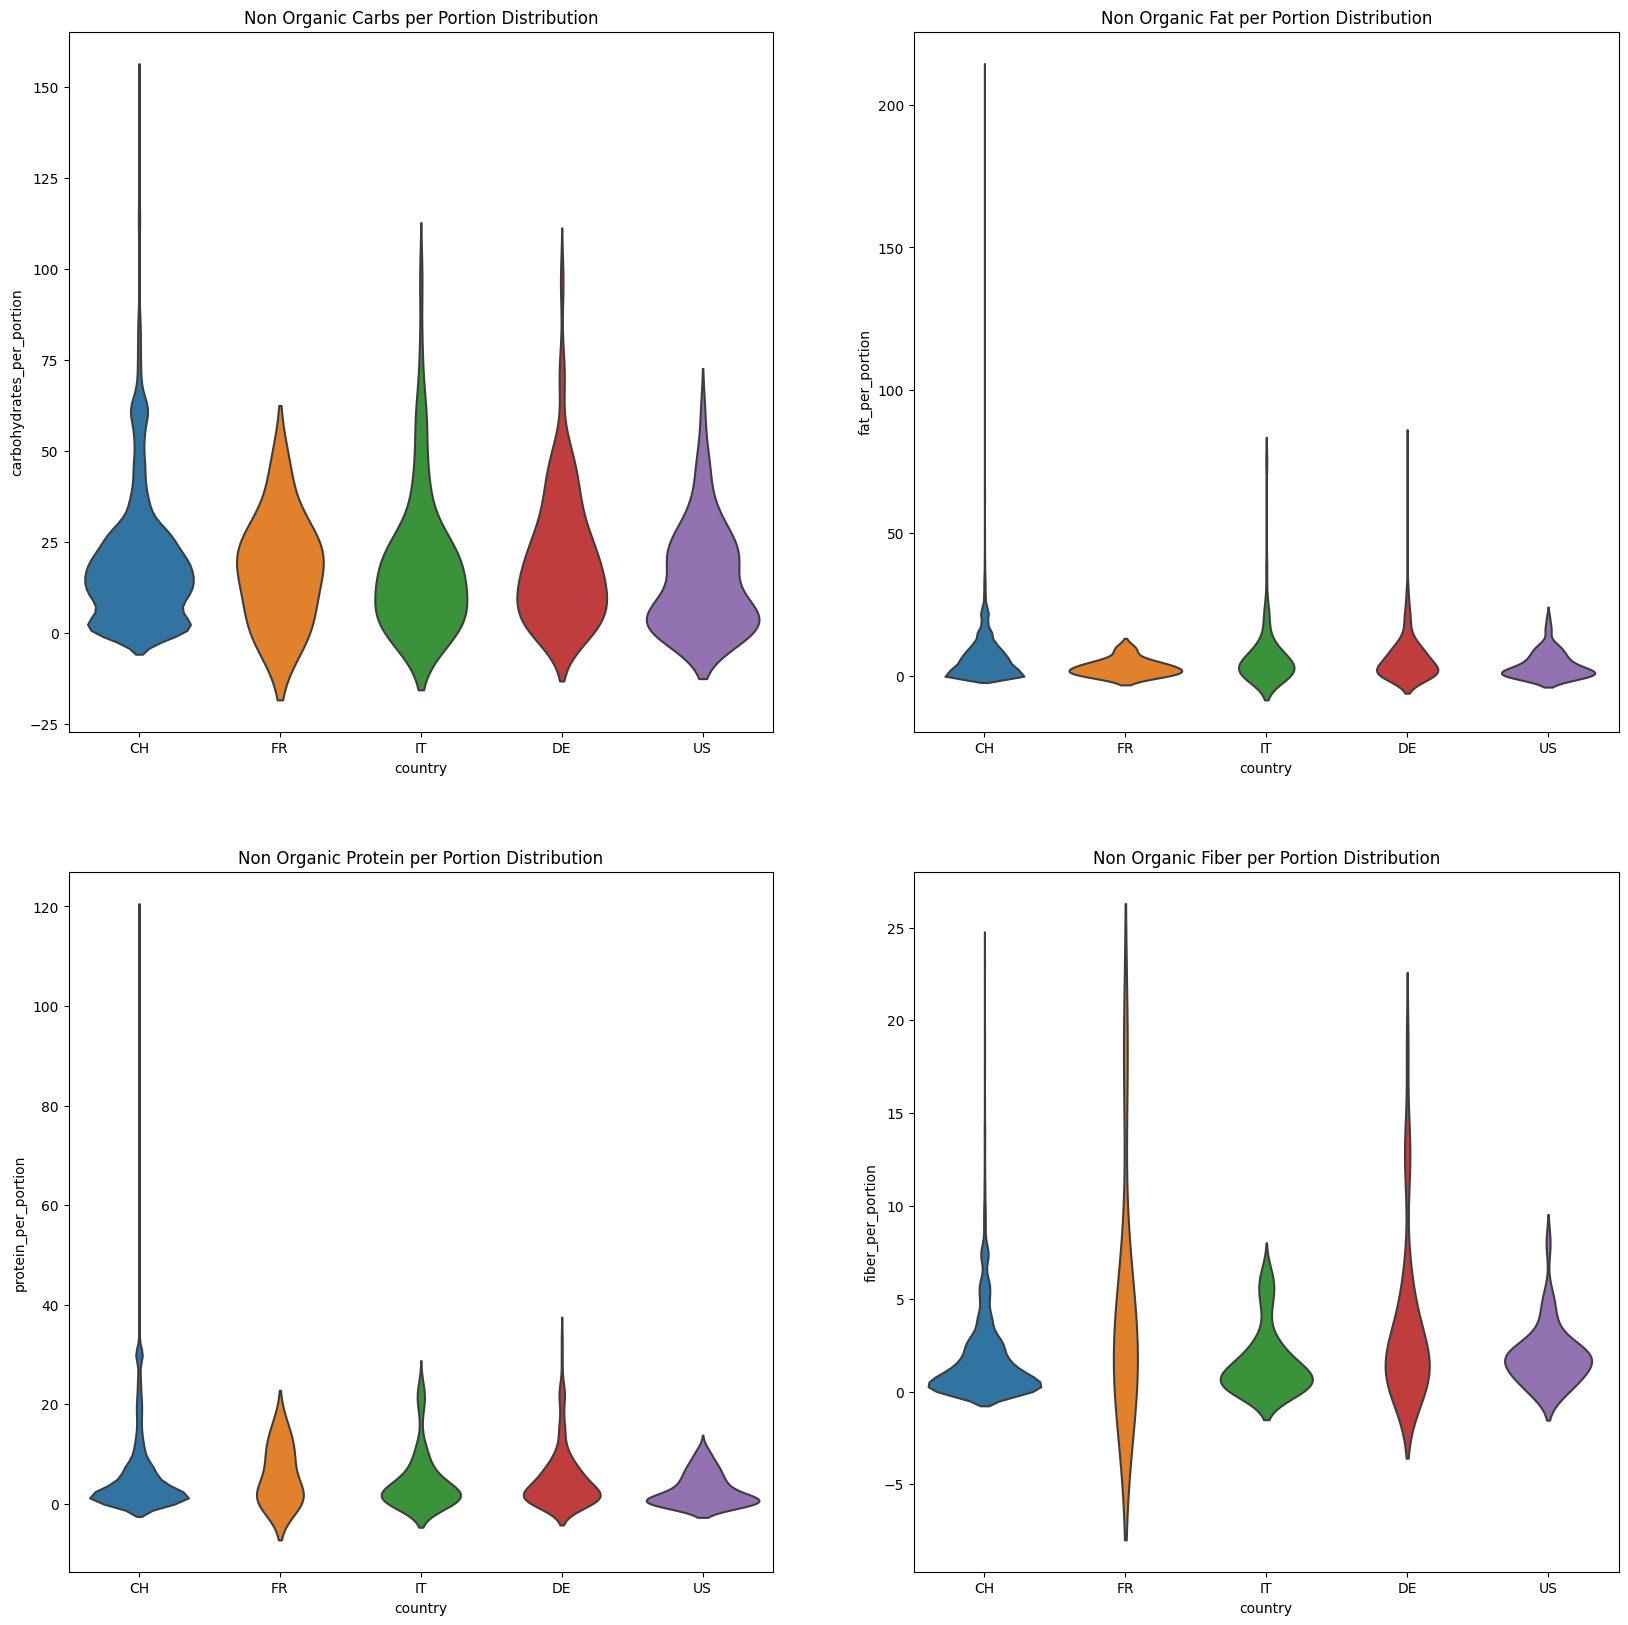

In [73]:
# Displaying multiple violin plots using subplot function.
fig1 , axes = plt.subplots(nrows=2,ncols=2 , figsize = (20,20))
sns.violinplot(x="country" , y = "carbohydrates_per_portion" , ax = axes[0,0] ,data=non_org , inner=None)
sns.violinplot(x="country" , y = "fat_per_portion" ,ax = axes[0,1] , data=non_org , inner=None)
sns.violinplot(x="country" , y = "protein_per_portion" , ax = axes[1,0] , data=non_org, inner=None)
sns.violinplot(x="country" , y = "fiber_per_portion" , ax = axes[1,1] , data=non_org, inner=None )

axes[0,0].set_title('Non Organic Carbs per Portion Distribution')
axes[0,1].set_title('Non Organic Fat per Portion Distribution')
axes[1,0].set_title('Non Organic Protein per Portion Distribution')
axes[1,1].set_title('Non Organic Fiber per Portion Distribution')
plt.show()

### Observations non-Organic Macronutrients Distributions

We have the participation of Italy and France on the non_organic violins.

* Non-Organic inn Carbs: Higher probability is among 0-25

Distributions reach more than 100. And Switzerland distribution till 150.

* Non-Organic in Fat: Higher probability is among 0-10

France and Deutschland distributions reached more than 90. 

Switzerland more than 200 (Dairy products: Chocolats and Cheese??)

* Non-Organic in Protein: Higher probability is  0-20

Switzerland distribution reached 120.

* Non-Organic in Fiber: Higher probability is near 0-5.

France distribution is higher with more than 25

## Appendix: working with SQL selecting organic products

#### Create a database

In [74]:
import sqlite3

db = sqlite3.connect("data_385k.db")
    
# defining our helper function for running queries
def run_query(query):
        return pd.read_sql_query(query, db)

### Loading the data into the database

In [75]:
df.to_sql(name="data_385k", con=db, if_exists="append", index=False)

385384

### Checking that all the data was loaded

In [76]:
run_query("SELECT COUNT(*) FROM data_385k")

,COUNT(*)
0,770766


### tbl_name sqlite_master (Master table)

"An important thing to know is that the table names are always listed in a column called tbl_name of a master table called sqlite_master."

In [77]:
#tbl_name sqlite_master (Master table)
#Retrieve tbl_name

run_query("SELECT tbl_name FROM sqlite_master;")

,tbl_name
0,data_385k


### Display a few entries

In [78]:
#Obtain the first five rows of this OpenFood (data_385k) table using

run_query("SELECT * FROM data_385k LIMIT 5;")

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,None,None,75.00,37.50,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,0.0,7610809001066,None,None,1.50,1.13,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,0.0,8002530159021,None,None,52.68,NaN,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0.0,3033715065788,None,None,70.40,11.97,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,0.0,7610848492740,None,None,37.00,7.40,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## G.a) Total number of samples by country  with SQL

What is the total number of samples by country? Countries with very small sample size should be **dropped** from this analysis as their results may not be statistically significant."

I computed the **number of samples by country** after creating a database using sqlite3 and making queries. 

For my own information: Attention if a column has No hifen, write it with double ticks (i. e "country sample")

In [79]:
query = """
    SELECT "country" AS 'Samples', COUNT(*) AS 'Number'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC;
    """
run_query(query)

,Samples,Number
0,US,656578
1,CH,87234
2,DE,21278
3,IT,5438
4,FR,236
5,UK,1
6,AT,1


### Create a Cursor Object from the Connect object db

"Now to run this query we will show you a different way that does not rely on pandas read_sql_query function. Instead, it works by creating a Cursor object from the Connect object db."

In [80]:
cursor = db.cursor()

### This cursor object has a method called execute.

In [81]:
cursor.execute(query)

### Drop countries with a very small sample size

Since UK and AT have only a single number, they were deleted

UK must be with double or ticks. Otherwise return error saying that UK is NOT a column.

"Rows can be deleted using a query with the keyword DELETE. For example we can delete the UK and AT rows of our database by executing the following query."

In [82]:
#UK must be with double or ticks, Use IN instead of =

delete = """
DELETE FROM data_385k
WHERE country IN ("UK", "AT");
"""
cursor.execute(delete)
db.commit()

### Verifying if United Kingdom (UK) and Austria (AT) rows were DELETED

In [83]:
query = """
    SELECT "country" AS 'Samples', COUNT(*) AS 'Number'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC;
    """
run_query(query)

,Samples,Number
0,US,656578
1,CH,87234
2,DE,21278
3,IT,5438
4,FR,236


Above, we can see that the majority of production was made by US (United States). Mostly, on Pandemics time (2021, April), according to the previous time series task.

### G.b) Number of Organic and Non-organic Products in each country

"Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?"

In [84]:
#Pick only specific columns. We can specify these in a comma-separated list

#Columns that we want, first 5 rows

run_query("SELECT country, product_name_en, product_name_de, product_name_fr FROM data_385k LIMIT 5;")

,country,product_name_en,product_name_de,product_name_fr
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,CH,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella
2,CH,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio
3,CH,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolat en poudre
4,CH,Naturaplan Extra Dark Chocolate 70%,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Chocolat extra noir 70%


### Use LIKE %word% to fetch the word that we're searching

"Look for terms such as **"bio" and "organic" in the product_names** (columns)

When I wrote Or including ALL the 3 product_names it return empty.

The SQL** LIKE Operator** is used in a WHERE clause to search for a specified pattern in a column.

There are two wildcards often used in conjunction with the LIKE operator:

The percent sign % represents zero, one, or multiple characters.

https://www.w3schools.com/sql/sql_like.asp

In [85]:
#LIKE %word% that we want
#https://stackoverflow.com/questions/14290857/sql-select-where-field-contains-words

#Use WHERE keyword to check

query = '''
SELECT country, product_name_en, product_name_de, product_name_fr FROM data_385K
WHERE product_name_en+ product_name_de+ product_name_fr LIKE '%organic%' OR product_name_en LIKE '%bio%'
LIMIT 5;
'''

run_query(query) 

,country,product_name_en,product_name_de,product_name_fr
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,CH,Naturaplan Bio Flower Honey,Naturaplan Bio Blütenhonig,Naturaplan Miel de fleurs Bio
2,CH,Bio Popcorn,Bio Popcorn Mais,Popcorn Maïs Bio
3,CH,Naturaplan Bio Mozzarella,Naturaplan Bio Mozzarella,Naturaplan Mozzarella Bio
4,CH,Naturaplan Bio whole Almonds,Naturaplan Bio Mandeln ganz,Naturaplan Amandes entières Bio


### Adding the total number of country samples.

Below. when the 2nd SELECT is indented, there is a COMMA on the previous line.

In [86]:
query = """
    SELECT country, product_name_en, product_name_de, product_name_fr, "country" AS 'countries', COUNT(*) AS 'prod_numbers',  
       (SELECT COUNT(*) FROM data_385k) AS 'prod_total'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC;
    """
run_query(query)

,country,product_name_en,product_name_de,product_name_fr,countries,prod_numbers,prod_total
0,US,Sprouts Organic Instant Oatmeal,None,None,US,656578,770764
1,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,CH,87234,770764
2,DE,None,None,Coca cola,DE,21278,770764
3,IT,"SUTTERA, Prestige","SUTTERA, Das Prestige","SUTTERA, Le Prestige",IT,5438,770764
4,FR,None,None,FROMAGE DE BREBIS,FR,236,770764


### Computing the percentage of Total products of each country

Keep the COMMA on the line (2nd line) before the indented SELECT

q1: is an alias for the table (temporary table)

Then select an additional column Percent that divides Number by Total, making sure column types have double precision.

SELECT (CAST (q1.Number AS double precision)/CAST (q1.Total AS double precision))*100 AS 'Percent'

ATTENTION: Since I changed number (from the exercise) to prod_numbers and Total to prod_total.

In [87]:
query = """
    
    SELECT *, (CAST (q1.prod_numbers AS double precision)/CAST (q1.prod_total AS double precision))*100 AS 'Percent'
    FROM (SELECT country, product_name_en, product_name_de, product_name_fr, "country" AS 'countries', COUNT(*) AS 'prod_numbers',
       (SELECT COUNT(*) FROM data_385k) AS 'prod_total'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC) q1
    """
run_query(query)

,country,product_name_en,product_name_de,product_name_fr,countries,prod_numbers,prod_total,Percent
0,US,Sprouts Organic Instant Oatmeal,None,None,US,656578,770764,85.185349
1,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,CH,87234,770764,11.317861
2,DE,None,None,Coca cola,DE,21278,770764,2.760637
3,IT,"SUTTERA, Prestige","SUTTERA, Das Prestige","SUTTERA, Le Prestige",IT,5438,770764,0.705534
4,FR,None,None,FROMAGE DE BREBIS,FR,236,770764,0.030619


The percents above just reproduce the absolute values that we found on the number of samples by country

(Task G.a, first task on this Notebook).

#### Semi-colon after % (bio%)

In [88]:
#LIKE %word% that we want
#https://stackoverflow.com/questions/14290857/sql-select-where-field-contains-words

#Use WHERE keyword to check

#query = """
    #SELECT country, product_name_en, product_name_de, product_name_fr, "country" AS 'countries', COUNT(*) AS 'prodBio_numbers'  
    #WHERE product_name_en LIKE '%organic%'
    #   OR product_name_en LIKE '%bio%'; 
    #   (SELECT COUNT(*) FROM data_385k) AS 'prodBio_total'
    #FROM data_385k   
    #GROUP BY "country"
    #ORDER BY COUNT(*) DESC;
    #"""
#run_query(query)

### ': no such table: country

Since I got : ': no such table: country after trying to Select the product_names columns organic/bio with WHERE/OR and COUNT I stopped the SQL query. I will try to search to solve it on a next opportunity.